In [1]:
pip install  yahooquery

     |████████████████████████████████| 51kB 2.7MB/s 
     |████████████████████████████████| 71kB 3.5MB/s 
     |████████████████████████████████| 5.5MB 18.6MB/s 
  Created wheel for requests-futures: filename=requests_futures-1.0.0-cp36-none-any.whl size=7011 sha256=89797bab749031cb23daf3eeff6855c487bc4380f7bc2593ae1e727544e8c9c9
  Stored in directory: /root/.cache/pip/wheels/26/d0/f5/dc4e4a37bbe55c9acf967d2bd899152412c1e49c227f5395ff
Successfully built requests-futures
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [18]:
import matplotlib.pyplot as plt
import pandas 

In [60]:
from yahooquery import Ticker

fsly = Ticker('3902.T')

In [63]:
income_statement = fsly.income_statement('q')
uriage = income_statement ['TotalRevenue']
print(uriage)

symbol
3902.T    9.710000e+08
3902.T    1.269237e+09
3902.T    1.042808e+09
3902.T    1.003748e+09
3902.T    1.106904e+09
3902.T    4.422697e+09
Name: TotalRevenue, dtype: float64


In [54]:
fsly.asset_profile

{'3676.T': {'address1': 'Tokyo Opera City Building',
  'address2': '41st Floor 3-20-2 Nishi-Shinjuku Shinjuku-ku',
  'city': 'Tokyo',
  'companyOfficers': [{'exercisedValue': 0,
    'maxAge': 1,
    'name': 'Mr. Genichi  Tamatsuka',
    'title': 'Pres, CEO & Representative Director',
    'unexercisedValue': 0},
   {'age': 54,
    'exercisedValue': 0,
    'maxAge': 1,
    'name': 'Mr. Toshiya  Tsukushi',
    'title': 'Exec. Officer, CFO & Director',
    'unexercisedValue': 0,
    'yearBorn': 1965},
   {'age': 44,
    'exercisedValue': 0,
    'maxAge': 1,
    'name': 'Mr. Keiya  Kazama',
    'title': 'Director of Fin. & Accounting and Corp. Auditor',
    'unexercisedValue': 0,
    'yearBorn': 1975},
   {'age': 47,
    'exercisedValue': 0,
    'maxAge': 1,
    'name': 'Mr. Yasumasa  Ninomiya',
    'title': 'Sales Mang., Exec. Officer & Director',
    'unexercisedValue': 0,
    'yearBorn': 1972},
   {'age': 55,
    'exercisedValue': 0,
    'maxAge': 1,
    'name': 'Dr. Juichi  Takahashi',


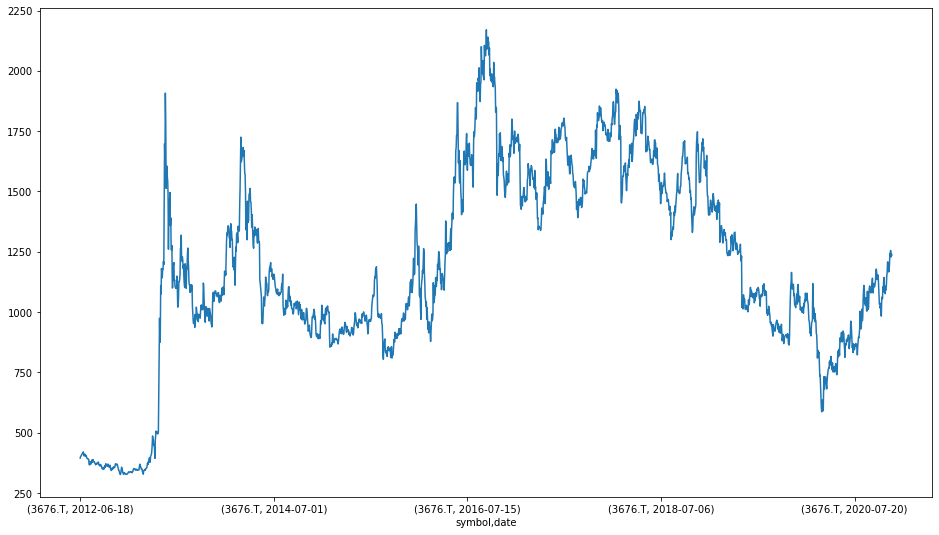

In [53]:
fsly.history(period='max')['close'].plot(figsize=(16, 9))

In [55]:
fsly.history(period='max')

low     open  volume  ...    close     adjclose  dividends
symbol date                                  ...                                 
3676.T 2012-06-18   389.00   411.00   16400  ...   394.25   352.870331        0.0
       2012-06-19   391.25   391.25    4000  ...   400.00   358.016815        0.0
       2012-06-20   397.50   400.00    2400  ...   402.25   360.030670        0.0
       2012-06-21   392.50   402.00   20800  ...   405.00   362.492035        0.0
       2012-06-22   410.00   410.00     800  ...   410.00   366.967224        0.0
...                    ...      ...     ...  ...      ...          ...        ...
       2020-12-07  1234.00  1268.00  184100  ...  1236.00  1236.000000        0.0
       2020-12-08  1212.00  1223.00   64200  ...  1255.00  1255.000000        0.0
       2020-12-09  1203.00  1250.00   80700  ...  1228.00  1228.000000        0.0
       2020-12-10  1218.00  1228.00   85800  ...  1242.00  1242.000000        0.0
       2020-12-11  1226.00  1248.00   53700  ...  1236.00  1236.000000        0.0

[2097 rows x 7 columns]

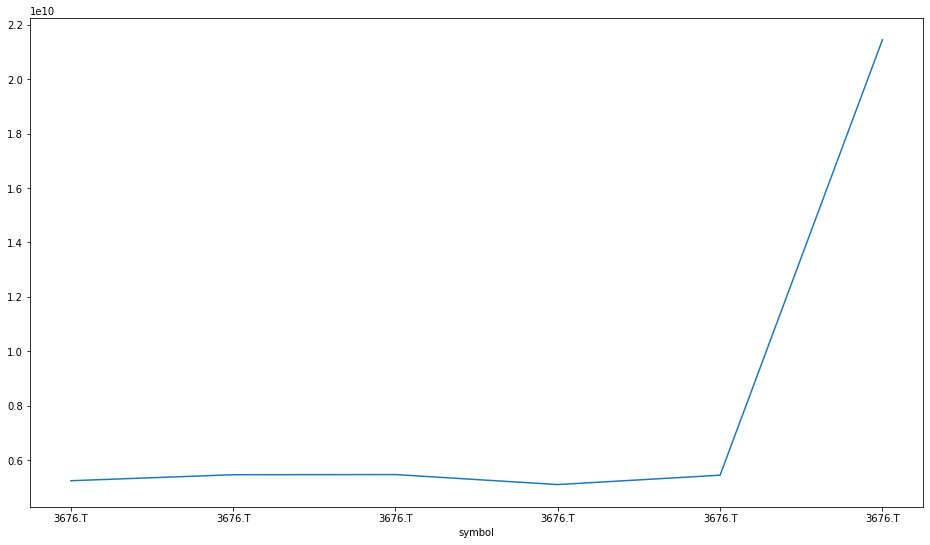

In [56]:
income_statement['TotalRevenue'].plot(figsize=(16, 9))

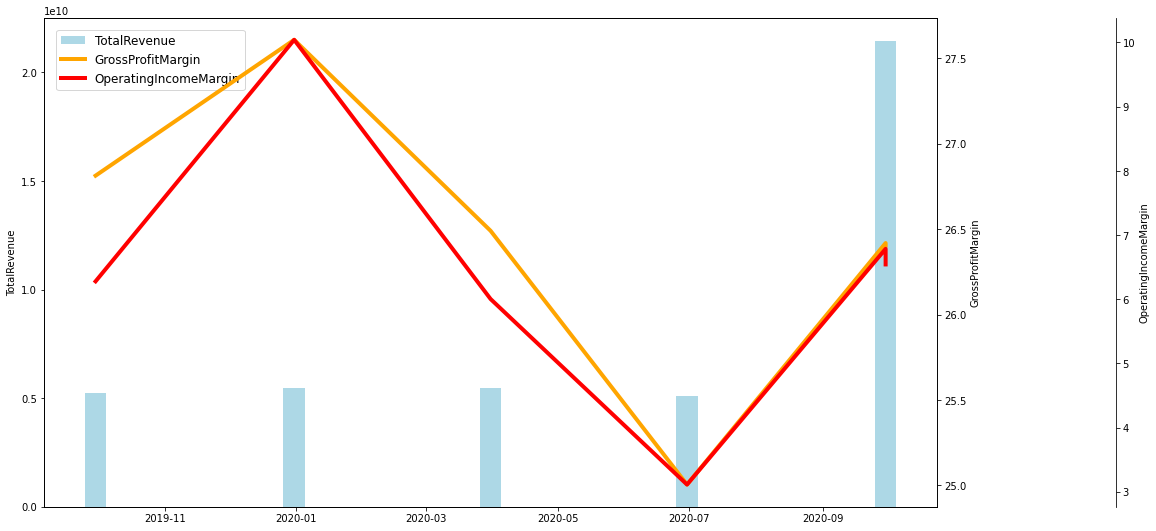

In [57]:
income_statement['GrossProfitMargin'] = (income_statement['GrossProfit'] / income_statement['TotalRevenue']) * 100
income_statement['OperatingIncomeMargin'] = (income_statement['OperatingIncome']) / income_statement['TotalRevenue'] * 100
income_statement

# 決算日付、売上高、粗利率、営業利益率をグラフ(3軸)に描画
fig, ax1 = plt.subplots(figsize=(16, 9))

# 売上高
ax1.bar(income_statement['asOfDate'], income_statement['TotalRevenue'], align="center", color="lightblue", width=10, label='TotalRevenue')
ax1.set_ylabel('TotalRevenue')
# ax1.legend('TotalRevenue')
 
# 粗利率
# 折れ線グラフを出力
ax2 = ax1.twinx()
ax2.plot(income_statement['asOfDate'], income_statement['GrossProfitMargin'], linewidth=4, color="orange", label='GrossProfitMargin')
ax2.set_ylabel('GrossProfitMargin')
# ax2.legend('GrossProfitMargin')

# 営業利益
# 折れ線グラフを出力
ax3 = ax1.twinx()
ax3.plot(income_statement['asOfDate'], income_statement['OperatingIncomeMargin'], linewidth=4, color="red", label='OperatingIncomeMargin')
ax3.set_ylabel('OperatingIncomeMargin')
# ax3.legend('OperatingIncomeMargin')

# 凡例
# グラフの本体設定時に、ラベルを手動で設定する必要があるのは、barplotのみ。plotは自動で設定される＞
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
handler3, label3 = ax3.get_legend_handles_labels()
# 凡例をまとめて出力する
# ax1.legend(handler1 + handler2 + handler3, label1 + label2 + label3, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0, fontsize=12)
ax1.legend(handler1 + handler2 + handler3, label1 + label2 + label3, loc='upper left', borderaxespad=1, fontsize=12)
ax3.spines["right"].set_position(("axes", 1.2))


In [58]:
income_statement = income_statement.query('periodType != "TTM"').sort_values('asOfDate')[['asOfDate', 'TotalRevenue', 'GrossProfit', 'OperatingIncome']]
income_statement

,asOfDate,TotalRevenue,GrossProfit,OperatingIncome
symbol,,,,
3676.T,2019-09-30,5.234124e+09,1.403414e+09,328671000.0
3676.T,2019-12-31,5.455209e+09,1.506056e+09,547809000.0
3676.T,2020-03-31,5.460524e+09,1.446495e+09,327830000.0
3676.T,2020-06-30,5.093299e+09,1.273600e+09,158589000.0
3676.T,2020-09-30,5.437903e+09,1.436614e+09,369001000.0


In [62]:
print(4.422697e+09)

4422697000.0
